In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

In [68]:
data = xr.open_dataset('slp.mon.mean.nc')

In [93]:
monthly_slp = data.slp.groupby("time.month")
monthly_avg_slp = monthly_slp.mean()
anomaly = monthly_slp - monthly_avg_slp 

easter_island = anomaly.sel(lat=-6.2088, lon=106.8456, method="nearest")

slp = anomaly
slp_corr = xr.corr(easter_island,slp, dim='time')
slp_corr, slp_cyclic_lon = add_cyclic_point(slp_corr, coord=slp_corr.lon)

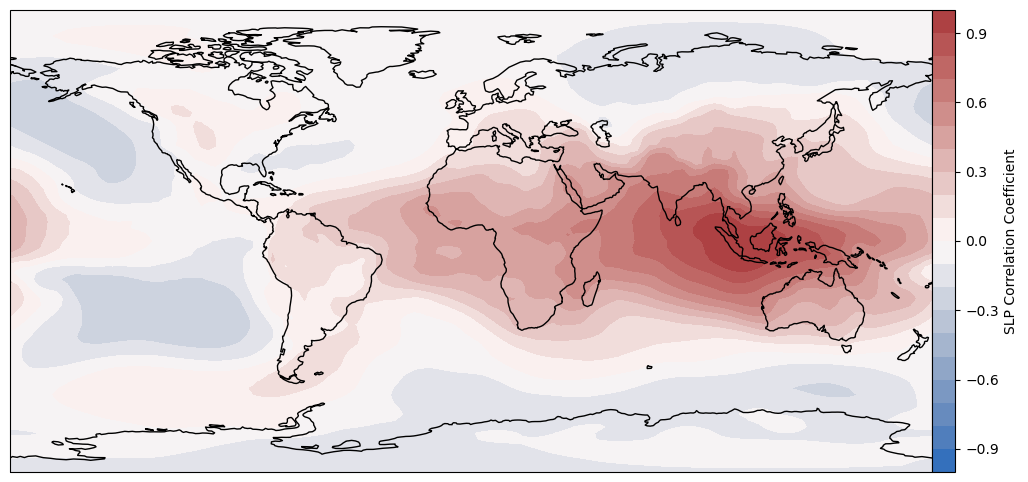

In [94]:
plt.figure(figsize=(14,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
c = ax.contourf(slp_cyclic_lon, data.lat, slp_corr, levels=np.arange(-1,1.1,.1), cmap="vlag", transform=ccrs.PlateCarree())
cax = plt.colorbar(c, pad=0)
cax.set_label("SLP Correlation Coefficient")